   # TASK 5: SALES PREDICTION USING PYTHON

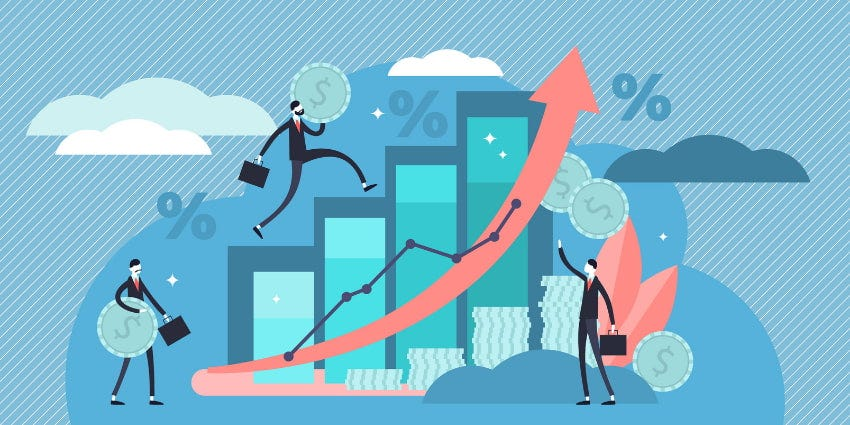

## Task Description:

- Sales prediction means predicting how much of a product people will buy based on factors such as the amount you spend to advertise your product, the segment of people you advertise for, or the platform you are advertising on about your product.
- Typically, a product and service-based business always need their Data Scientist to predict their future sales with every step they take to manipulate the cost of advertising their product. So let’s start the task of sales prediction with machine learning using Python.

## About the Dataset:

The advertising dataset [link](https://www.kaggle.com/datasets/bumba5341/advertisingcsv) consists of sales of the products in 200 different markets. It also includes advertising budgets for the product in each of those markets for three different media: TV, radio, and newspapers. The dataframe with 200 rows and 5 variables are as follows:

- Unnamed: 0 - contains index 
- TV: a numeric vector indicating the advertising budget on TV.
- Radio: a numeric vector indicating the advertising budget on radio.
- Newspaper: a numeric vector indicating the advertising budget on newspaper.
- Sales: a numeric vector indicating the sales of the interest product.


## Problem Statement

The problem at hand involves predicting future sales for product and service-based businesses. With the dynamic nature of the market, businesses need to anticipate sales figures based on various factors, including advertising expenses, audience targeting, and the choice of advertising platforms.

**Challenges:**

- Variable Impact of Advertising: Understanding how different levels of advertising expenditure influence sales is a complex challenge.
- Audience Segmentation: Identifying and analyzing the diverse audience segments to predict their impact on sales.
- Platform Optimization: Determining the optimal advertising platforms for maximizing sales outcomes.

## Objective:

The dataset has advertising data sales (in thousands of units) for a particular product advertising budgets (in thousands of dollars) for TV, radio, and newspaper media. On the basis of this data, we need to suggest a marketing plan for future sales that will result in high product sales. We have to create various regression models with a focus on robust performance. And the identify the optimal model based on to its balanced accuracy and generalization. So, we have to use this advertising dataset given in the task and analyse the predicted sales based on the given advertising expenditures using the best regression model. The model should provide actionable insights into the relationships between advertising investments, audience segments, and advertising platforms with sales figures.

## Importing all the necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import numpy as np
import pandas as pd

# Data Viz
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.graph_objects as go 

# ML Models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

## Exploratory Data Analysis (EDA)

In [2]:
# load the data from csv file to Pandas DataFrame

sales_df = pd.read_csv(r'C:\Users\BINDU MADHURI\Desktop\OIBSIP\SALES PREDICTION USING PYTHON\Advertising.csv')

In [3]:
# Function to check number of rows and columns of dataset, number of missing values in each column,
# glimpse of the dataframe, statistical and important information about the dataset 

def analysis(data):
    print(f'Advertising Data Size  : {data.size}')
    print(f'\nShape of the dataframe: {data.shape[0]} rows and {data.shape[1]} columns')
    print("*" * 100)
    print("\nDisplaying the initial records of the dataset:")
    display(data.head())
    print("*" * 100)
    print("\nStatistical measures about the data:")
    display(data.describe())
    print("*" * 100)
    print("\nSome important information about the dataframe:\n")
    display(data.info())
    print("*" * 110)
    
data = sales_df
analysis(sales_df)

Advertising Data Size  : 1000

Shape of the dataframe: 200 rows and 5 columns
****************************************************************************************************

Displaying the initial records of the dataset:


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


****************************************************************************************************

Statistical measures about the data:


,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


****************************************************************************************************

Some important information about the dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


None

**************************************************************************************************************


In [4]:
# Drop unnecessary column
sales_df = sales_df.drop(columns="Unnamed: 0", axis=1)
sales_df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


## Data Visualization

**Note:** GitHub does not render interactive graphs. View the dynamic visualization by runing the code locally for full interactivity or try loading this page with nbviewer.org

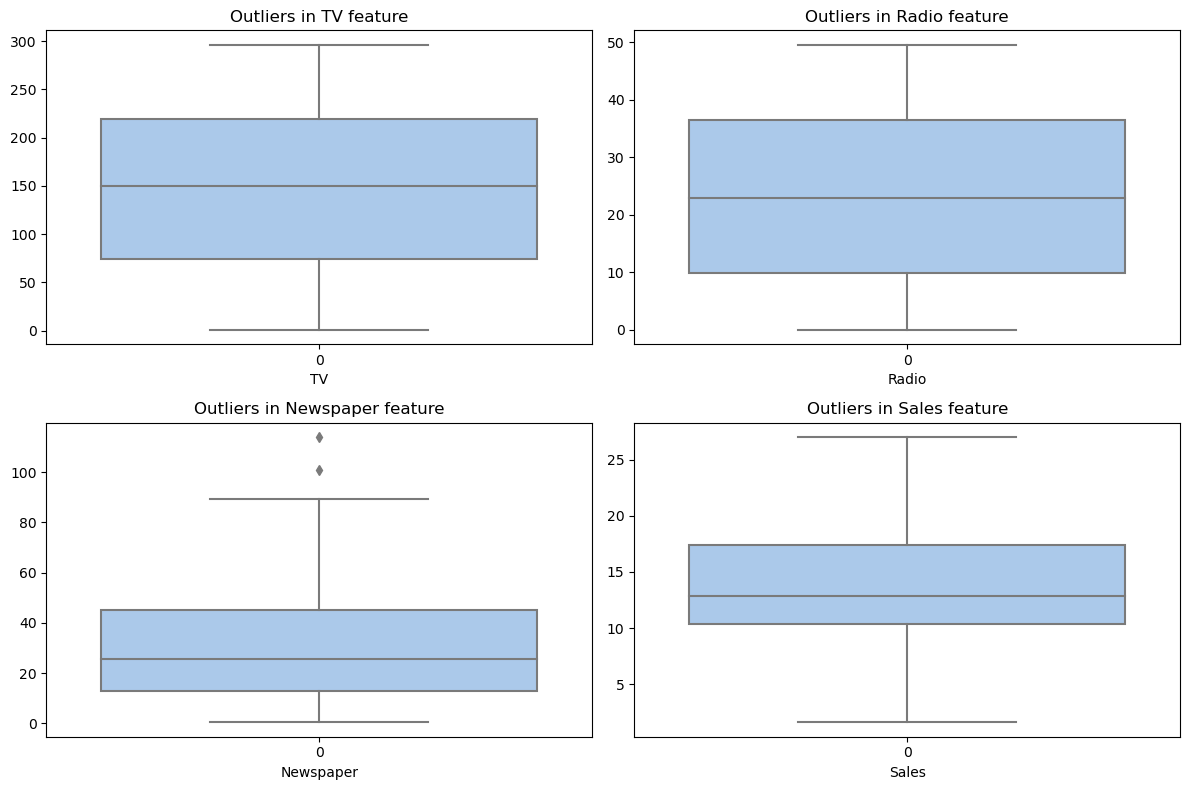

In [5]:
# Visualizing outliers using boxplots
plt.figure(figsize=(12, 8))

columns = {0: "TV", 1: "Radio", 2: "Newspaper", 3: "Sales"}

for plot, col_name in columns.items():
    plt.subplot(2, 2, plot + 1)
    sns.boxplot(data=sales_df[col_name],palette="pastel")
    plt.xlabel(col_name)
    plt.title("Outliers in {} feature".format(col_name))

plt.tight_layout()
plt.show()

Here from the above visualization, we see a small amount of outliers in the Newspapers category, while the other categories have no outliers.

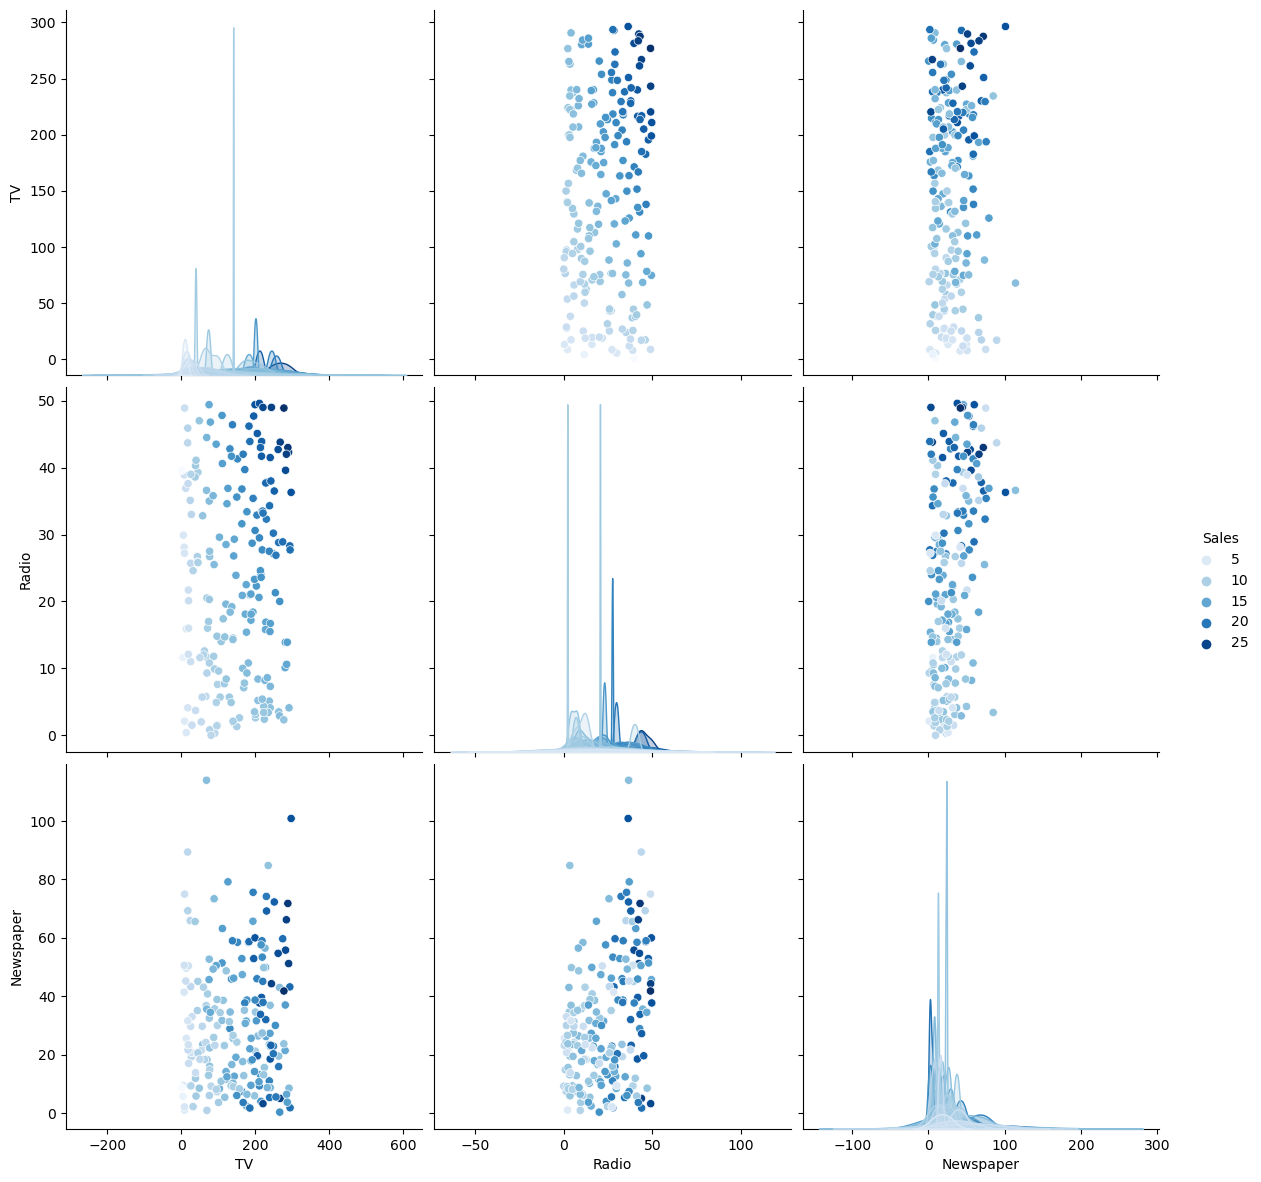

In [6]:
# using scatterplot to see how sales is related to the other variables 
sns.pairplot(sales_df, kind = 'scatter', aspect = 1, height = 4, palette = 'Blues', hue='Sales')

As it is clearly comprehensible through the above visualization, the expenditure on the advertisement of TV has the most positive effect than other media on the target(sales) variable.

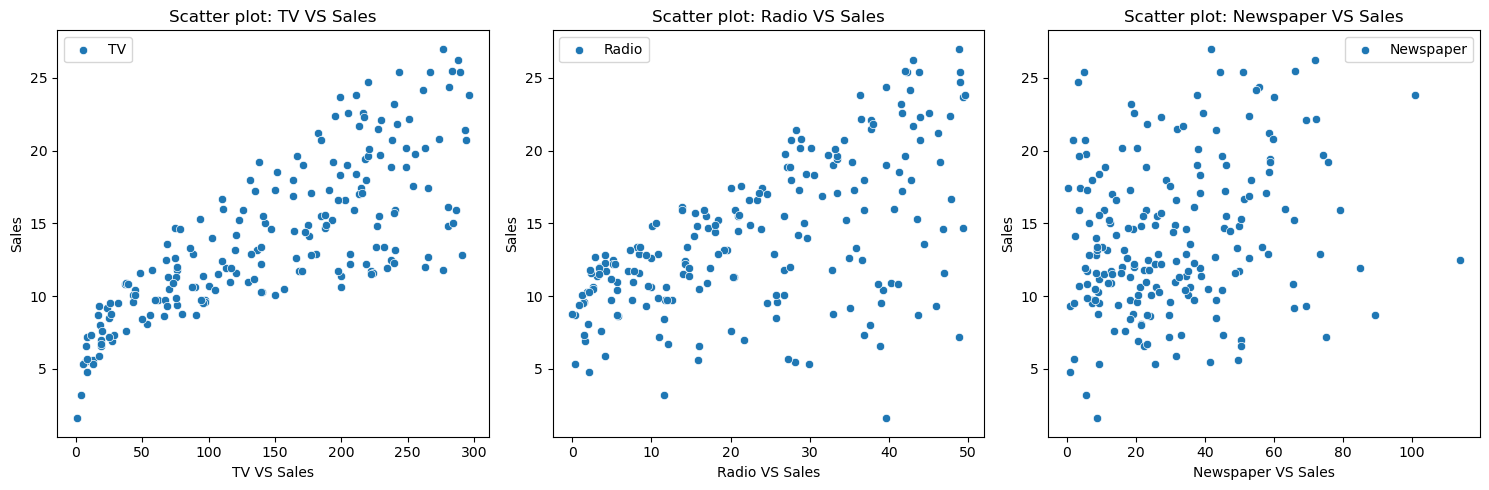

In [7]:
# Plot relationship between variables

plt.figure(figsize=(15, 5))

columns = {0: "TV", 1: "Radio", 2: "Newspaper"}

for plot, col_name in columns.items():
    plt.subplot(1, 3, plot + 1)
    sns.scatterplot(x=sales_df[col_name],y=sales_df["Sales"], label= col_name, palette="pastel")
    plt.xlabel("{} VS Sales".format(col_name))
    plt.title("Scatter plot: {} VS Sales".format(col_name))
    plt.legend()

plt.tight_layout()
plt.show()

In the above visualization, we can clearly see that the products with increased TV ads, have increased sales compared to other channels i.e. Sales is highly correlated with TV and the relation seems to be little less with the other channels.

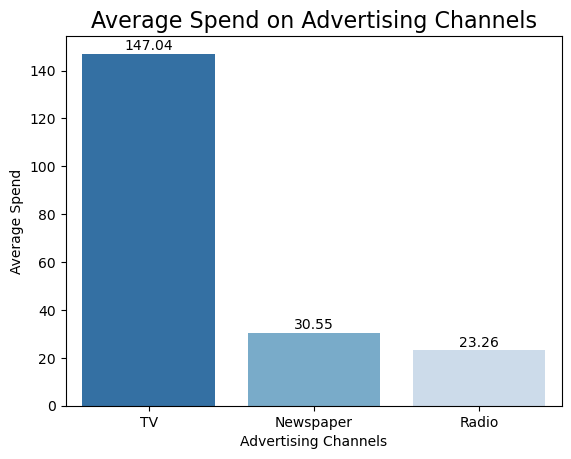

In [8]:
# Avgerage spend on advertising

avg_spend = sales_df[['TV','Newspaper','Radio']].mean()

ax=sns.barplot(x=avg_spend.index, y=avg_spend.values,palette='Blues_r', linewidth=0)

for i, v in enumerate(avg_spend.values):
    ax.text(i,v + 0.2, f'{v:.2f}', va='bottom',ha='center')


plt.title('Average Spend on Advertising Channels', fontsize=16)
plt.xlabel('Advertising Channels', fontsize=10)
plt.ylabel('Average Spend', fontsize=10)
ax.yaxis.grid(False)
plt.show()

In the above visualization, we can clearly see that average spend on advertising TV channel is around 147 dollars which is the highest spend compared to other advertising channels like Radio and Newspaper.  

## Correlation

In [9]:
#Checking correlation between variables
sales_df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


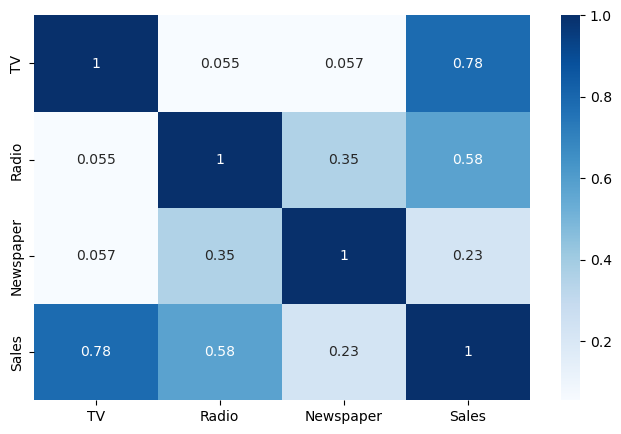

In [10]:
# Visualizing correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(sales_df.corr(), cmap="Blues", annot = True)
plt.show()

- TV and Sales: strong positive correlation - As the budget for TV advertising increases, Sales tend to increase.
- Radio and Sales: moderate positive correlation - Increasing Radio advertising spending is associated with an increase in Sales, but the relationship is not as strong as with TV.
- Newspaper and Sales: weak positive correlation - The impact of Newspaper advertising on Sales is weaker compared to TV and Radio.

## Data Preprocessing

In [11]:
##Checking for missing values in the dataframe
print(f'\nMissing values in each column: \n{sales_df.isnull().sum()} ')
print(f'\nTotal missing values in the dataframe: {sales_df.isnull().sum().sum()} ')


Missing values in each column: 
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64 

Total missing values in the dataframe: 0 


In [12]:
# Displaying the number of unique values for each column
for i in sales_df:
    print("No. of unique values in %s column are: %s" % (i, sales_df[i].nunique()))

No. of unique values in TV column are: 190
No. of unique values in Radio column are: 167
No. of unique values in Newspaper column are: 172
No. of unique values in Sales column are: 121


## Split the data into features (X) and target variable (y)

In [13]:
X = data[["TV", "Radio", "Newspaper"]]
y = data[['Sales']]

In [14]:
print(X.head())
print()
print(y.head())

      TV  Radio  Newspaper
0  230.1   37.8       69.2
1   44.5   39.3       45.1
2   17.2   45.9       69.3
3  151.5   41.3       58.5
4  180.8   10.8       58.4

   Sales
0   22.1
1   10.4
2    9.3
3   18.5
4   12.9


In [15]:
print((X.shape), (y.shape))

(200, 3) (200, 1)


## Splitting the data into Train and Test Data

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 3) (40, 3) (160, 1) (40, 1)


# Model Training

## Building Linear Regression Model

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [19]:
My_models = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression', 'Decision Tree Regression','Random Forest Regression', 'Gradient Boosting', 'XGBoost Regression', 'KNN Regression']

MSE_Score = []

In [20]:
#Fit model
linear = LinearRegression()
linear.fit(X_train, y_train)

#Coefficient for all advertising media
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, linear.coef_[0][idx]))

The coefficient for TV is 0.044729517468716326
The coefficient for Radio is 0.18919505423437655
The coefficient for Newspaper is 0.0027611143413671757


In [21]:
#Get Intercept value
intercept = linear.intercept_[0]
print("the intercept for our linear model is {}".format(intercept))

the intercept for our linear model is 2.979067338122629


In [22]:
#Predict the model
y_pred_train_linear = linear.predict(X_train)
y_pred_test_linear = linear.predict(X_test)

#### Performance metrics 

In [23]:
#Evaluate the model on the test data
print("Mean Absolute Error (MAE) :", metrics.mean_absolute_error(y_test, y_pred_test_linear))
print("Mean Absolute Percent Error (MAPE) :", metrics.mean_absolute_error(y_test, y_pred_test_linear)/100)
linear_mse = metrics.mean_squared_error(y_test, y_pred_test_linear)
print("Mean Square Error (MSE) :", linear_mse)
print("Root Mean Square Error (RMSE) :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_linear)))
r_squared_train_linear = r2_score(y_train, y_pred_train_linear)
r_squared_test_linear = r2_score(y_test, y_pred_test_linear)
print("R-squared Score (Train) :", r_squared_train_linear)
print("R-squared Score (Test) :", r_squared_test_linear)

MSE_Score.append(round(linear_mse,3))

Mean Absolute Error (MAE) : 1.4607567168117606
Mean Absolute Percent Error (MAPE) : 0.014607567168117605
Mean Square Error (MSE) : 3.1740973539761046
Root Mean Square Error (RMSE) : 1.7815996615334502
R-squared Score (Train) : 0.8957008271017818
R-squared Score (Test) : 0.899438024100912


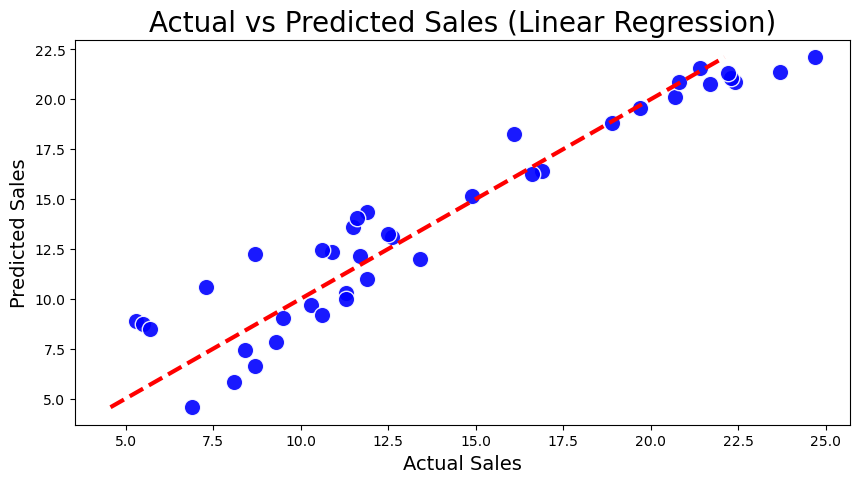

In [24]:
# Visualize Predicted Vs Actual Values

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_test_linear, color='blue', alpha=0.9, edgecolors='w', s=140)

plt.plot([min(y_pred_test_linear), max(y_pred_test_linear)], [min(y_pred_test_linear), max(y_pred_test_linear)], linestyle='--', color='red', linewidth=3)

plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs Predicted Sales (Linear Regression)', fontsize=20);

We can see that it is a perfectly accurate linear model for the prediction of sales

## Regularisation Method

### Part 1: Lasso Regression model

In [25]:
#Fit model
from sklearn.linear_model import Lasso 
# exact zero or closure to zero
# penalty = 0.1
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
print("Lasso Model :", (lasso.coef_))

Lasso Model : [0.04471961 0.18881106 0.00262707]


In [26]:
#Predict the model
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

In [27]:
lasso.intercept_

array([2.99335201])

#### Performance metrics

In [28]:
#Evaluate the model on the test data
print("Mean Absolute Error (MAE) :", metrics.mean_absolute_error(y_test, y_pred_test_lasso))
print("Mean Absolute Percent Error (MAPE) :", metrics.mean_absolute_error(y_test, y_pred_test_lasso)/100)
lasso_mse = metrics.mean_squared_error(y_test, y_pred_test_lasso)
print("Mean Square Error (MSE) :", lasso_mse)
print("Root Mean Square Error (RMSE) :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_lasso)))
print("R-squared Score (Train) :", r2_score(y_train, y_pred_train_lasso))
print("R-squared Score (Test) :", r2_score(y_test, y_pred_test_lasso))

MSE_Score.append(round(lasso_mse,3))

Mean Absolute Error (MAE) : 1.4597951733194978
Mean Absolute Percent Error (MAPE) : 0.014597951733194978
Mean Square Error (MSE) : 3.1705218127881327
Root Mean Square Error (RMSE) : 1.7805959150767847
R-squared Score (Train) : 0.8956987933652097
R-squared Score (Test) : 0.8995513046486308


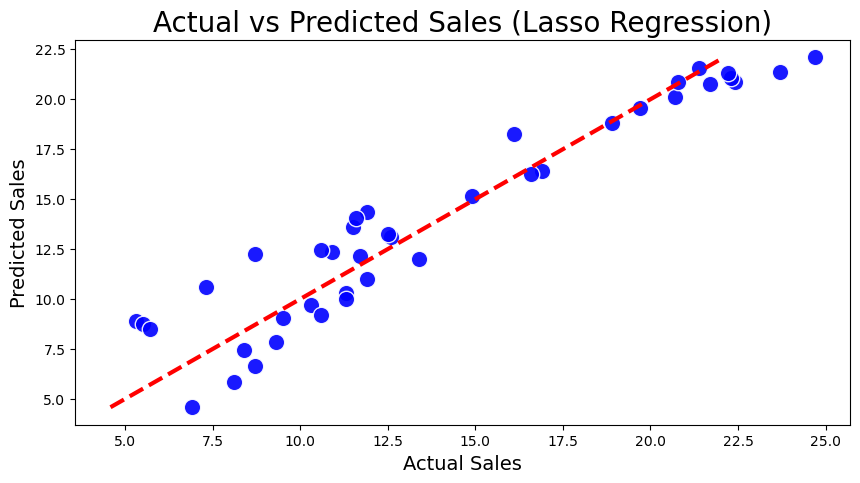

In [29]:
# Visualize Predicted Vs Actual Values

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_test_lasso, color='blue', alpha=0.9, edgecolors='w', s=140)

plt.plot([min(y_pred_test_lasso), max(y_pred_test_lasso)], [min(y_pred_test_lasso), max(y_pred_test_lasso)], linestyle='--', color='red', linewidth=3)

plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs Predicted Sales (Lasso Regression)', fontsize=20);

### Part 2 : Ridge Regression (L2- Regularization)

In [30]:
# Always this method is used. Because Lasso completely removes the variable.
# closure to zero but not exact zero
# penalty - 0.3
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.3)
ridge.fit(X_train, y_train)
print("Ridge Model :", (ridge.coef_))

Ridge Model : [[0.04472952 0.18919314 0.00276164]]


In [31]:
#Predict the model
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

In [32]:
ridge.coef_

array([[0.04472952, 0.18919314, 0.00276164]])

#### Performance metrics

In [33]:
#Evaluate the model on the test data
print("Mean Absolute Error (MAE) :", metrics.mean_absolute_error(y_test, y_pred_test_ridge))
print("Mean Absolute Percent Error (MAPE) :", metrics.mean_absolute_error(y_test, y_pred_test_ridge)/100)
ridge_mse = metrics.mean_squared_error(y_test, y_pred_test_ridge)
print("Mean Square Error (MSE) :", ridge_mse)
print("Root Mean Square Error (RMSE) :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_ridge)))
print("R-squared Score (Train) :", r2_score(y_train, y_pred_train_ridge))
print("R-squared Score (Test) :", r2_score(y_test, y_pred_test_ridge))

MSE_Score.append(round(ridge_mse,3))

Mean Absolute Error (MAE) : 1.4607593852592866
Mean Absolute Percent Error (MAPE) : 0.014607593852592866
Mean Square Error (MSE) : 3.174096589584106
Root Mean Square Error (RMSE) : 1.7815994470093737
R-squared Score (Train) : 0.8957008270757678
R-squared Score (Test) : 0.8994380483184331


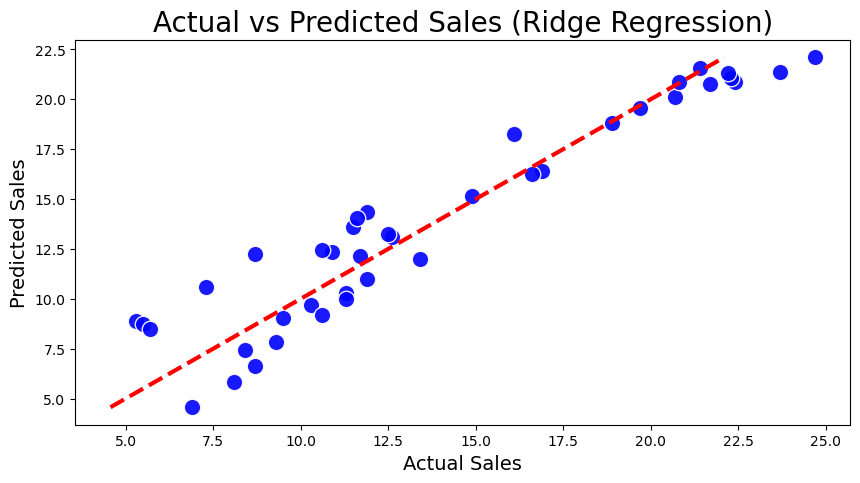

In [34]:
# Visualize Predicted Vs Actual Values

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_test_ridge, color='blue', alpha=0.9, edgecolors='w', s=140)

plt.plot([min(y_pred_test_ridge), max(y_pred_test_ridge)], [min(y_pred_test_ridge), max(y_pred_test_ridge)], linestyle='--', color='red', linewidth=3)

plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs Predicted Sales (Ridge Regression)', fontsize=20);

### Part 3: ElasticNet Regression model

In [35]:
#Fit model
from sklearn.linear_model import ElasticNet
elastic = ElasticNet(alpha=0.3, l1_ratio=0.1)
elastic.fit(X_train, y_train)

ElasticNet(alpha=0.3, l1_ratio=0.1)

In [36]:
#Predict the model
y_pred_train_elastic = elastic.predict(X_train)
y_pred_test_elastic = elastic.predict(X_test)

In [37]:
elastic.coef_

array([0.04472706, 0.18880585, 0.00279644])

#### Performance metrics

In [38]:
#Evaluate the model on the test data
print("Mean Absolute Error (MAE) :", metrics.mean_absolute_error(y_test, y_pred_test_elastic))
print("Mean Absolute Percent Error (MAPE) :", metrics.mean_absolute_error(y_test, y_pred_test_elastic)/100)
elastic_mse = metrics.mean_squared_error(y_test, y_pred_test_elastic)
print("Mean Square Error (MSE) :", elastic_mse)
print("Root Mean Square Error (RMSE) :", np.sqrt(metrics.mean_squared_error(y_test, y_pred_test_elastic)))
print("R-squared Score (Train) :", r2_score(y_train, y_pred_train_elastic))
print("R-squared Score (Test) :", r2_score(y_test, y_pred_test_elastic))

MSE_Score.append(round(elastic_mse,3))

Mean Absolute Error (MAE) : 1.4608509609785565
Mean Absolute Percent Error (MAPE) : 0.014608509609785564
Mean Square Error (MSE) : 3.172931197133922
Root Mean Square Error (RMSE) : 1.7812723534411916
R-squared Score (Train) : 0.89569965187139
R-squared Score (Test) : 0.8994749703641106


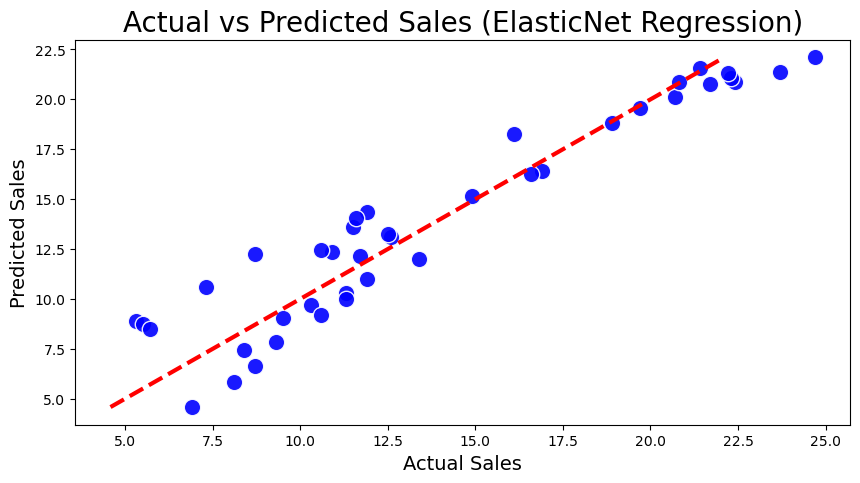

In [39]:
# Visualize Predicted Vs Actual Values

plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_test_ridge, color='blue', alpha=0.9, edgecolors='w', s=140)

plt.plot([min(y_pred_test_elastic), max(y_pred_test_elastic)], [min(y_pred_test_elastic), max(y_pred_test_elastic)], linestyle='--', color='red', linewidth=3)

plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs Predicted Sales (ElasticNet Regression)', fontsize=20);

In [40]:
#Training all the Regression models together

#Fit model - Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

#Fit model - Decision Tree Regression
DTree_model = DecisionTreeRegressor(max_depth = 6)
DTree_model.fit(X_train, y_train)

#Fit model - Random Forest Regression
RF_model = RandomForestRegressor(n_estimators = 500, random_state = 1, max_depth = 6)
RF_model.fit(X_train, y_train)

#Fit model - Gradient Boosting Regressor
GDBoosting_model = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, random_state = 123)
GDBoosting_model.fit(X_train, y_train)     

#Fit model - XGBoost Regression
XGBoost_model = xgb.XGBRegressor(random_state = 111, max_depth = 2)
XGBoost_model.fit(X_train, y_train)

#Fit model - KNN Regression
KNN_model = KNeighborsRegressor(n_neighbors = 5)
KNN_model.fit(X_train, y_train)

KNeighborsRegressor()

In [41]:
# Make prediction and check accuracy for Linear Regression
linear_test_prediction = linear_model.predict(X_test)
r2_score_linear = r2_score(y_test, linear_test_prediction)

# Make prediction and check accuracy for Decision Tree Regression
DTree_test_prediction = DTree_model.predict(X_test)
r2_score_DTree = r2_score(y_test, DTree_test_prediction)

# Make prediction and check accuracy for Random Forest Regression
RF_test_prediction = RF_model.predict(X_test)
r2_score_RF = r2_score(y_test, RF_test_prediction)

# Make prediction and check accuracy for Gradient Boosting Regressor
GDBoosting_test_prediction = GDBoosting_model.predict(X_test)
r2_score_GDBoosting = r2_score(y_test, GDBoosting_test_prediction)

# Make prediction and check accuracy for XGBoost Regression
XGBoost_test_prediction = XGBoost_model.predict(X_test)
r2_score_XGBoost = r2_score(y_test, XGBoost_test_prediction)

# Make prediction and check accuracy for KNN Regression
KNN_test_prediction = KNN_model.predict(X_test)
r2_score_KNN = r2_score(y_test, KNN_test_prediction)

In [42]:
regressor_scores = [
    ("Linear Regression", r2_score_linear),
    ("Decision Tree Regressor", r2_score_DTree),
    ("Random Forest Regressor", r2_score_RF),
    ("Gradient Boosting Regressor", r2_score_GDBoosting),
    ("XGBoost Regressor", r2_score_XGBoost),
    ("KNN Regressor", r2_score_KNN),
]

# Sort the regressor accuracy scores in descending order based on the R-squared score
sorted_regressor_scores = sorted(regressor_scores, reverse=True, key=lambda x: x[1])

# Print the sorted regressor scores
for regressor, score in sorted_regressor_scores:
    print(f"{regressor}\n R-squared score: {score}\n")

Gradient Boosting Regressor
 R-squared score: 0.9834248913567983

Random Forest Regressor
 R-squared score: 0.9803987857348595

XGBoost Regressor
 R-squared score: 0.9803449158273124

Decision Tree Regressor
 R-squared score: 0.9231066032758164

KNN Regressor
 R-squared score: 0.9106204438460053

Linear Regression
 R-squared score: 0.899438024100912



Among all the models evaluated, Gradient Boosting Regression model performed the best with around 98.3% accuracy, followed by Random Forest Regression model and XGBoost Regression model with 98% accuracy. 

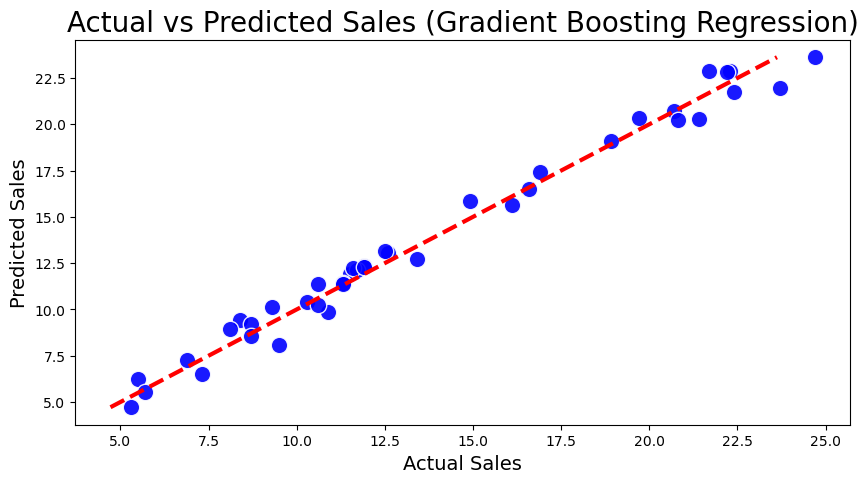

In [43]:
# Visualize Predicted Vs Actual Values for Gradient Boosting Regression

plt.figure(figsize=(10,5))
plt.scatter(y_test, GDBoosting_test_prediction, color='blue', alpha=0.9, edgecolors='w', s=140)

plt.plot([min(GDBoosting_test_prediction), max(GDBoosting_test_prediction)], [min(GDBoosting_test_prediction), max(GDBoosting_test_prediction)], linestyle='--', color='red', linewidth=3)

plt.xlabel('Actual Sales', fontsize=14)
plt.ylabel('Predicted Sales', fontsize=14)
plt.title('Actual vs Predicted Sales (Gradient Boosting Regression)', fontsize=20);

#### Performance metrics for all the models

In [44]:
#MSE score for Decision Tree Regression
DecisionTree_mse = metrics.mean_squared_error(y_test, DTree_test_prediction)
MSE_Score.append(round(DecisionTree_mse,3))

#MSE score for Random Forest Regression
RandomForest_mse = metrics.mean_squared_error(y_test, RF_test_prediction)
MSE_Score.append(round(RandomForest_mse,3))

#MSE score for Gradient Boosting Regression
GDBoosting_mse = metrics.mean_squared_error(y_test, GDBoosting_test_prediction)
MSE_Score.append(round(GDBoosting_mse,3))

#MSE score for XGBoost Regression
XGBoost_mse = metrics.mean_squared_error(y_test, XGBoost_test_prediction)
MSE_Score.append(round(XGBoost_mse,3))

#MSE score for KNN Regression
KNN_mse = metrics.mean_squared_error(y_test, KNN_test_prediction)
MSE_Score.append(round(KNN_mse,3))

In [45]:
# MSE scores comparison for all the models
final_MSE = pd.DataFrame()
final_MSE.index = My_models
final_MSE['MSE'] = MSE_Score

#sorting MSE scores from highest to lowest 
final_MSE.sort_values(by="MSE", ascending=False)

,MSE
Linear Regression,3.174
Ridge Regression,3.174
ElasticNet Regression,3.173
Lasso Regression,3.171
KNN Regression,2.821
Decision Tree Regression,2.427
XGBoost Regression,0.620
Random Forest Regression,0.619
Gradient Boosting,0.523


From the above MSE results, we can see that, Gradient Boosting Regression model performed the best with lowest Mean Squared Error (MSE) of 0.523 compared to other model's MSE scores.

##### Deciding to go with Gradient Boosting Regression model, since it has maximum accuracy with less mean squared error. 

## ML-Ops: Operationalizing a Machine Learning Model

In [46]:
# Inference from hypothetical data
TV = float(input('Enter the amount spent on TV Advertising: '))
Radio = float(input('Enter the amount spent on Radio Advertising: '))
Newspaper = float(input('Enter the amount spent on Newspaper Advertising: '))

Enter the amount spent on TV Advertising: 76.3
Enter the amount spent on Radio Advertising: 27
Enter the amount spent on Newspaper Advertising: 18


In [47]:
# Predict on unseen data
input_list = [TV, Radio, Newspaper]
input_list

Sales_Prediction = GDBoosting_model.predict([input_list])
print(f'The predicted Sales based on the given advertising expenditures is {Sales_Prediction[0]:,.2f}, the model has an associated Mean Squared Error of {GDBoosting_mse:.3f}.')

The predicted Sales based on the given advertising expenditures is 11.67, the model has an associated Mean Squared Error of 0.523.


## Saving Gradient Boosting Regression model and generating the output file

In [48]:
#Predicting the sales for output file
final_result = pd.DataFrame(GDBoosting_model.predict(X))
final_result = final_result.rename(columns = {0 : "Sales_Predicted"})
final_result

,Sales_Predicted
0,22.048257
1,10.698852
2,9.193038
3,18.292673
4,13.264615
...,...
195,7.691121
196,9.866588
197,12.627166
198,25.493438


In [49]:
#Generating the output file with predicted sales
final_model = pd.concat([sales_df, pd.DataFrame(final_result)], axis = 1)
final_model

,TV,Radio,Newspaper,Sales,Sales_Predicted
0,230.1,37.8,69.2,22.1,22.048257
1,44.5,39.3,45.1,10.4,10.698852
2,17.2,45.9,69.3,9.3,9.193038
3,151.5,41.3,58.5,18.5,18.292673
4,180.8,10.8,58.4,12.9,13.264615
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,7.691121
196,94.2,4.9,8.1,9.7,9.866588
197,177.0,9.3,6.4,12.8,12.627166
198,283.6,42.0,66.2,25.5,25.493438


In [50]:
final_model.to_csv(r"C:\Users\BINDU MADHURI\Desktop\OIBSIP\SALES PREDICTION USING PYTHON\Sales_Prediction.csv")

In [51]:
#Displaying final accuracy score and MSE
print("Final Accuracy Score:",r2_score(final_model['Sales'], final_model['Sales_Predicted']))
print("Final Mean Squared Error:",metrics.mean_squared_error(final_model['Sales'], final_model['Sales_Predicted']))

Final Accuracy Score: 0.9951662951181687
Final Mean Squared Error: 0.13092449179240626


## Conclusion:

- In analyzing the Sales Prediction Dataset, I navigated through data visualization, preprocessing, and machine learning model selection.
- The characteristics of the dataset, including the nature of relationships and noise, influence model performance. Simple models like Linear Regression and Regularization methods like Lasso,Ridge are best when dealing with linear relationships.
- We have observed that there is a small amount of outliers in the Newspapers category, while the other categories have no outliers. And since Newspaper category have less correlation with target, no outliers treatment is required.
- Sales exhibit a positive correlation with both TV and Radio advertising expenses, signifying the effectiveness of these channels.
- Notably, there's a strong correlation between TV advertising expenses and sales, emphasizing the impact of TV advertising on driving sales.
- The R2 score, chosen as the evaluation metric, showcased the accuracy of the model in predicting sales.
- Among the models evaluated, Gradient Boosting Regression model performed the best with around 98.3% accuracy and lowest Mean Squared Error (MSE) of 0.523, followed by Random Forest Regression model with 98% accuracy and Mean Squared Error (MSE) of 0.619 and XGBoost Regression model with 98% accuracy and Mean Squared Error (MSE) of 0.620. 
- Hence, Gradient Boosting Regression is identified as the optimal model based on to its balanced accuracy and generalization with accurate sales predictions.